<a href="https://colab.research.google.com/github/LindaDeltax/Frame_Extraction/blob/main/Extract_Frame_TimeStamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract the whole frames from video and save their timestamps in text file.
## Write the datetime in the each extracted image file

In [ ]:
import os
import cv2
import glob
from datetime import datetime

def Videos():
    return glob.glob("./video/*.mp4")

print(Videos())

def extract_frames():
    return


for vidName in Videos():
    vidcap = cv2.VideoCapture(vidName) #open the camera

    #print('cv2.CAP_PROP_FRAME_WIDTH :', cv2.CAP_PROP_FRAME_WIDTH)   # 3 or width = vidcap.get(cv2.CAP_PROP_FRAME_WIDTH )
    #print('cv2.CAP_PROP_FRAME_HEIGHT:', cv2.CAP_PROP_FRAME_HEIGHT)  # 4 or height = vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT )
    #print('cv2.CAP_PROP_FPS         :', cv2.CAP_PROP_FPS)           # 5 or fps =  vidcap.get(cv2.CAP_PROP_FPS)
    #print('cv2.CAP_PROP_FRAME_COUNT :', cv2.CAP_PROP_FRAME_COUNT)   # 7
    
    # duration = frame_count/fps
    # minutes = int(duration/60)
    # seconds = duration%60
    # print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))
    
    # to get the frame count = vidcap.get(7)
    # n_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    print("Processing: ", vidName, " - ", vidcap.get(7), " frames")
    
    success,image = vidcap.read()
    count = 0
    success = True
    dirname = vidName.replace('.mp4', '_frames_new/')
    output_dir="output"
    output_dir2="output_timestamps"
    directory = os.path.dirname(dirname)
    if not os.path.exists(directory):
        os.makedirs(directory)

    while success:
      # Put current DateTime on each frame
      font = cv2.FONT_HERSHEY_PLAIN
      cv2.putText(image, str(datetime.now()), (20, 40), font, 2, (255, 255, 255), 2, cv2.LINE_AA)
      date_time=datetime.now()
      currTime = date_time.strftime("%Y-%m-%d %H:%M:%S")
      #cv2.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
      cv2.imwrite(dirname + "frame%d_%s.jpg" % (count, currTime), image)     # save frame as JPEG file
      cv2.imwrite(dirname + "frame%d_%s.jpg" % (count, str(vidcap.get(cv2.CAP_PROP_POS_MSEC))), image)     # save frame as JPEG file
      success,image = vidcap.read()
      #print(count, ' - Read a new frame: ', success)
      if not os.path.exists('{}/timestamp'.format(output_dir)):  # create timestamp folder if not exists
            os.makedirs('{}/timestamp'.format(output_dir))
      with open('{}/timestamp/frame_{}.txt'.format(output_dir, str(count).zfill(4)), 'w') as f:  # write timestamp in text file for each frame captured from video capture object (vidcap object here is the video capture object of python OpenCV library) and it will be used to calculate FPS later on by using ffmpeg command line tool to get FPS value from input video file name and output directory path where frames are saved into .jpg files or .png files or other formats supported by FFMPEG tool such as GIF images etc.)
            f.write("%s" % str(vidcap.get(cv2.CAP_PROP_POS_MSEC)))  # write timestamp in text file for each frame captured from video capture object (vidcap object here is the video capture object of python OpenCV library), this timebase variable will be used to calculate FPS later on by using ffmpeg command line tool to get FPS value from input video file name and output directory path where frames are saved into .jpg files or .png files or other formats supported by FFMPEG tool such as GIF images etc.)
  
      count += 1
    print("--> Done")

['./video/WIN_20221026_17_07_20_Pro.mp4']
Processing:  ./video/WIN_20221026_17_07_20_Pro.mp4  -  319.0  frames
--> Done


# Extract a frame based on the specific timestamp

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import time
from datetime import datetime


# video_file = '../videos/test_video.mp4' # path to the video file
video_file = './video/WIN_20221026_17_07_20_Pro.mp4' # path to the video file
cap = cv2.VideoCapture(video_file)  # capture frames from a video
print(cap.isOpened())
# True

def getFrameWithTimeStamp(sec, cap):  # function to extract frame at given second and return it with time stamp in form of string (HH:MM:SS)
    success,image = cap.read()
    count = 0
    success = True
    cap.set(cv2.CAP_PROP_POS_MSEC, sec ) #* 1000)  # set position of the frame at given second

    #hasFrames, image = cap.read()  # read frame from the captured video stream

    if success:  # check if there is any frame available or not for that particular second in our video stream
        date_time=datetime.now()
        currTime = date_time.strftime("%Y-%m-%d %H:%M:%S")  # convert current time into string format (HH:MM:SS) using gmtime() method of python's datetime library
        filename = 'frame_'
        cv2.imwrite("test_image/frame%s.jpg"% currTime, image)
        print(currTime)
        return success, image, currTime  		# return extracted frame along with timestamp in form of string (HH:MM:SS) and boolean value indicating whether there are more frames left or not after this extracted one i.e., True if there are more frames else False

True


2023-02-06 09:10:23


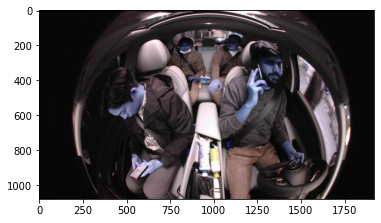

In [ ]:
image=getFrameWithTimeStamp(4976,cap)
plt.imshow(image[1])

In [ ]:
cap.release()